In [1]:
import pandas as pd

In [2]:
#on importe le fichier au format .tsv. Nous prenons ici l'exemple du code appliqué à l'Odyssée d'Homère.

odyssee = pd.read_csv("/users/margotpascual/Documents/CorpusLEM/Homere_Odyssee.tsv", sep="\t")
odyssee.head()

,token,lemma,POS,morph,treated
0,Édition,édition,NOMcom,NOMB.=s,Édition
1,du,de_le,PRE.DETdef,NOMB.=s|GENRE=m,du
2,groupe,groupe,NOMcom,NOMB.=s|GENRE=m,groupe
3,«,«,PONpga,MORPH=empty,«
4,Ebooks,ebooks,ADJqua,MODE=imp|NOMB.=s|GENRE=m,Ebooks


In [3]:
#nous mettons les tokens traités en minuscule

odyssee["treated"] = odyssee["treated"].str.lower()

In [4]:
import nltk

In [5]:
from nltk.tokenize import RegexpTokenizer

In [6]:
regex=RegexpTokenizer("\w+")
odyssee["treated"] = odyssee["treated"].apply(regex.tokenize)

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/margotpascual/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
list_stopwords = nltk.corpus.stopwords.words("french")

In [10]:
#on enlève les mots inutiles à l'analyse

list_stopwords

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [11]:
odyssee["treated"] = odyssee["treated"].apply(lambda x: [token for token in x if token not in list_stopwords])

In [12]:
list_comp = ["https"]
odyssee["treated"] = odyssee["treated"].apply(lambda x: [token for token in x if token not in list_comp])

In [13]:
odyssee.shape

(141367, 5)

In [14]:
odyssee["treated"] = odyssee["treated"].apply(lambda x: [token for token in x if len(token)>2])

In [15]:
odyssee

,token,lemma,POS,morph,treated
0,Édition,édition,NOMcom,NOMB.=s,[édition]
1,du,de_le,PRE.DETdef,NOMB.=s|GENRE=m,[]
2,groupe,groupe,NOMcom,NOMB.=s|GENRE=m,[groupe]
3,«,«,PONpga,MORPH=empty,[]
4,Ebooks,ebooks,ADJqua,MODE=imp|NOMB.=s|GENRE=m,[ebooks]
...,...,...,...,...,...
141362,LITTÉRAIRES,lité,NOMpro,NOMB.=s,[littéraires]
141363,.,.,PONfrt,MORPH=empty,[]
141364,–,-,PROper,MORPH=empty,[]
141365,349,349,PROper,NOMB.=s,[349]


In [16]:
odyssee["treated"] = odyssee["treated"].apply(lambda x: " ".join([token for token in x]))

In [17]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/margotpascual/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [19]:
odyssee["treated"] = odyssee["treated"].apply(wordnet.lemmatize)

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
mots = " ".join([mot for mot in odyssee["treated"]])

In [22]:
mots

'édition  groupe  ebooks libres  gratuits  homère traduction charles  rené  marie leconte   isle  odyssée table  matières chant                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    115  

In [23]:
#on effectue le nuage de mots

nuage_mots = WordCloud(background_color="white").generate(mots)

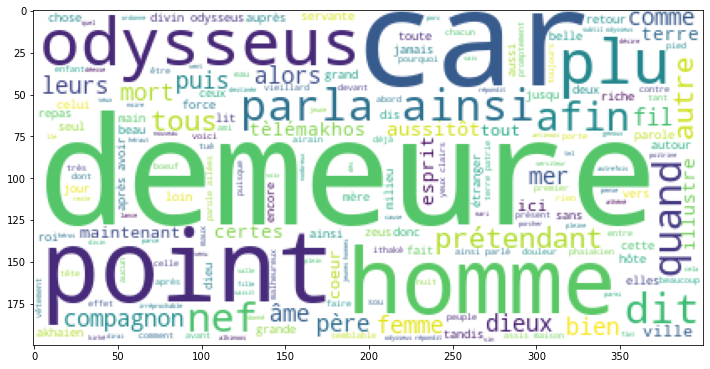

In [24]:
plt.figure(figsize=(12,7))
plt.imshow(nuage_mots)

In [25]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/margotpascual/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
mots

'édition  groupe  ebooks libres  gratuits  homère traduction charles  rené  marie leconte   isle  odyssée table  matières chant                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    115  

In [27]:
words = nltk.word_tokenize(mots)

In [28]:
#on calcule la fréquence de nos mots lemmatisés et traités

freq = FreqDist(words)

In [29]:
freq

FreqDist({'odysseus': 681, 'ainsi': 621, 'tous': 469, 'car': 428, 'point': 410, 'plus': 407, 'demeure': 395, 'hommes': 356, 'dit': 353, 'dieux': 324, ...})